<a href="https://colab.research.google.com/github/RoldTech/RoldTech/blob/main/Compositing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Evaluate: Compositing

ACTIVITY 1

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

def cv2_imshow(image, code=cv2.COLOR_BGR2RGB):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, code))

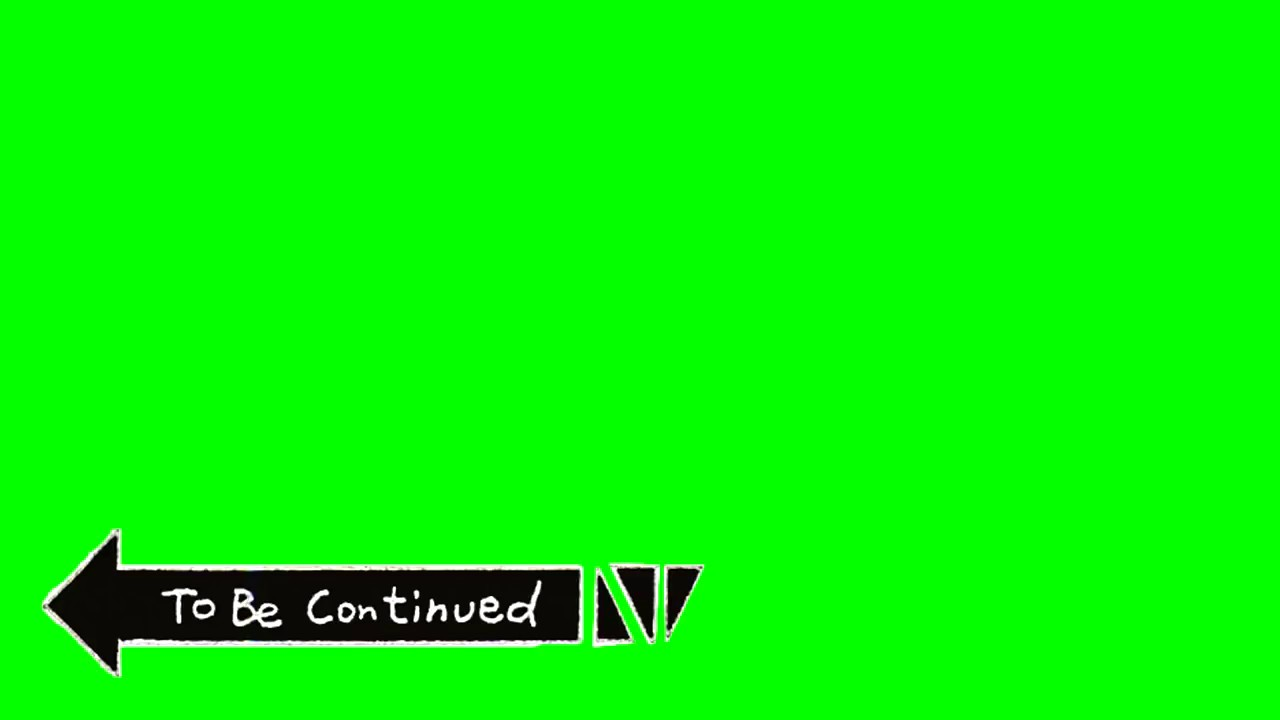

In [25]:
img = cv2.imread("wati.jpg")
def get_color_dist(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))

cv2_imshow(img)

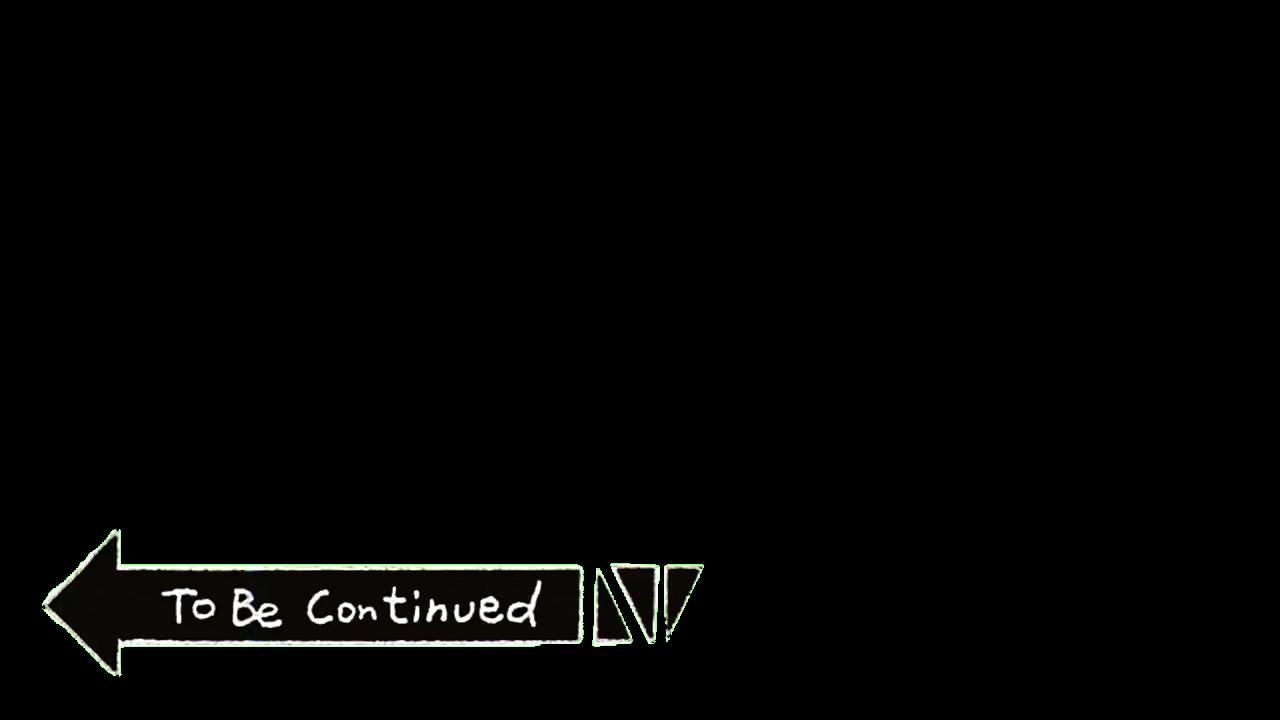

In [24]:

height, width, channels = img.shape
chroma_key = (12, 228, 35)
sensitivity = 150

img = cv2.imread("wati.jpg")

def get_color_dist(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))

for x in range(height):
    for y in range(width):
        pixel = img[x, y]
        if get_color_dist(chroma_key, pixel) < sensitivity:
            img[x, y] = np.array([0, 0, 0])


cv2_imshow(img)

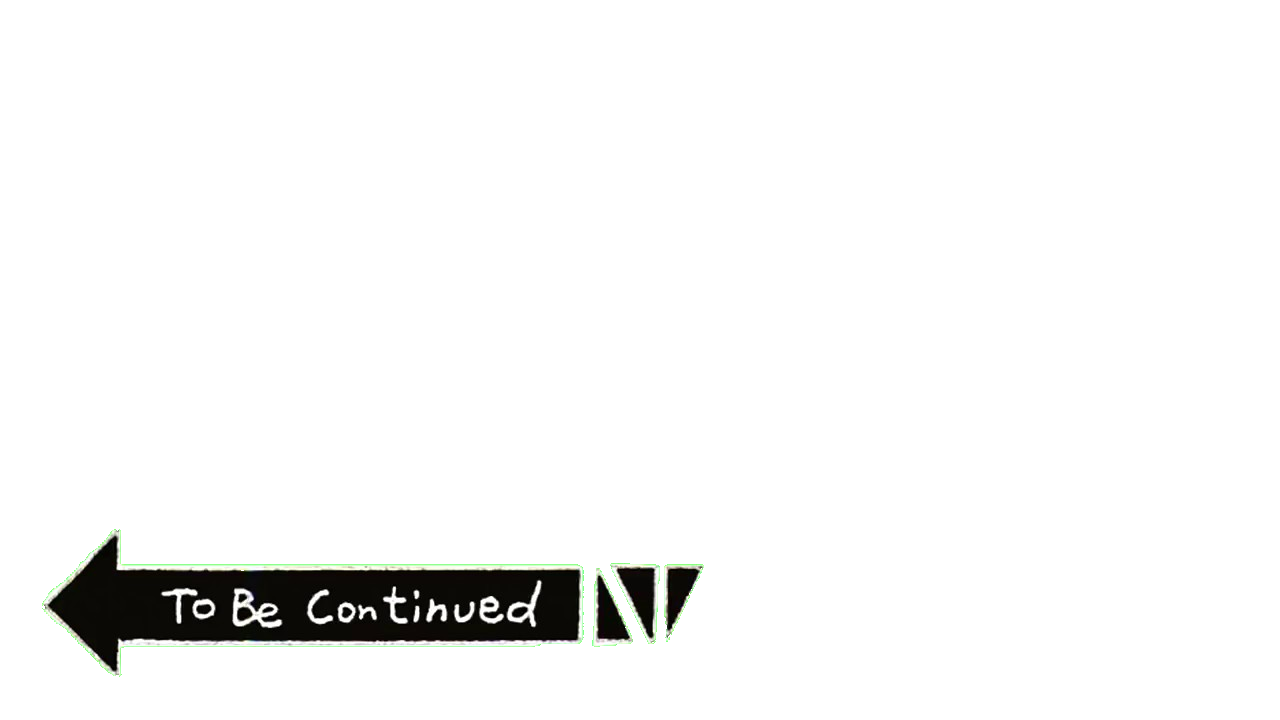

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow



def get_color_dist(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))

img = cv2.imread("wati.jpg")

height, width, channels = img.shape
chroma_key = (12, 228, 35)
sensitivity = 150

# Create an alpha channel with the same size as the image
alpha_channel = np.ones((height, width), dtype=np.uint8) * 255

for x in range(height):
    for y in range(width):
        pixel = img[x, y]
        if get_color_dist(chroma_key, pixel) < sensitivity:
            # Set the alpha channel to 0 for transparent pixels
            alpha_channel[x, y] = 0


img = cv2.merge((img, alpha_channel[:, :, np.newaxis]))


cv2_imshow(img)


ACTIVITY 2

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


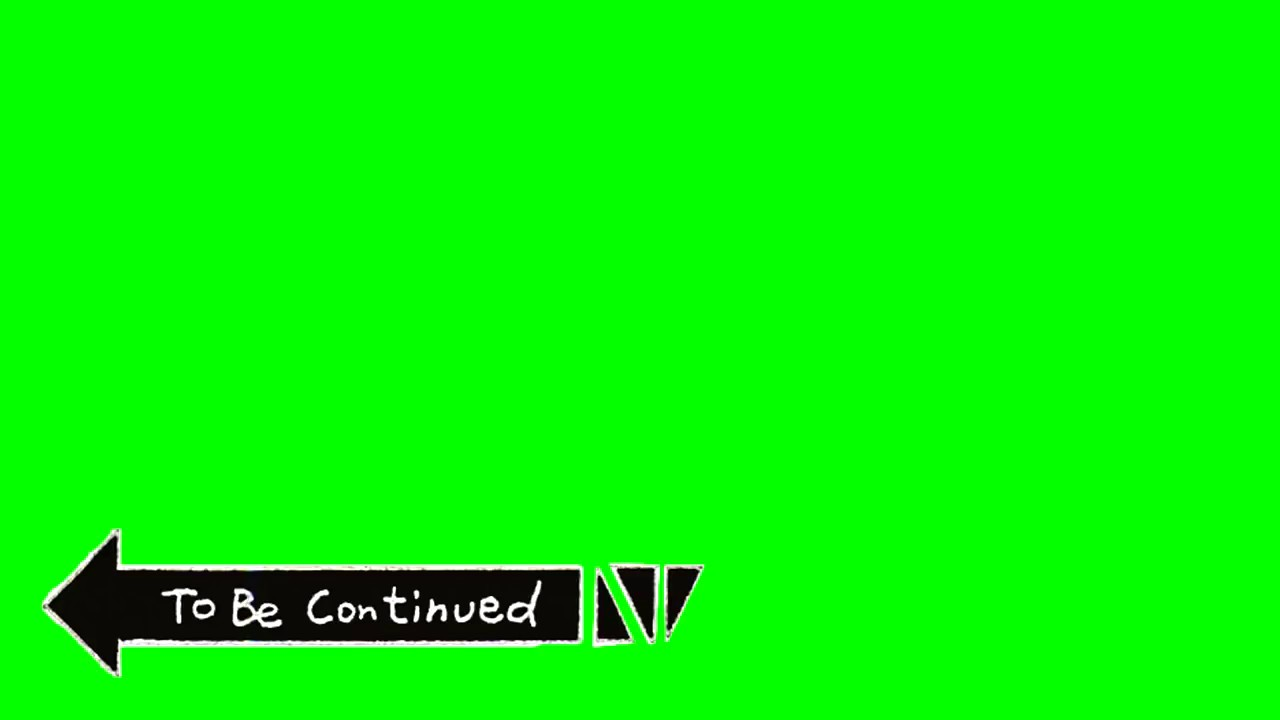

In [31]:
img = cv2.imread("wati.jpg")
def get_color_dist(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))

cv2_imshow(img)

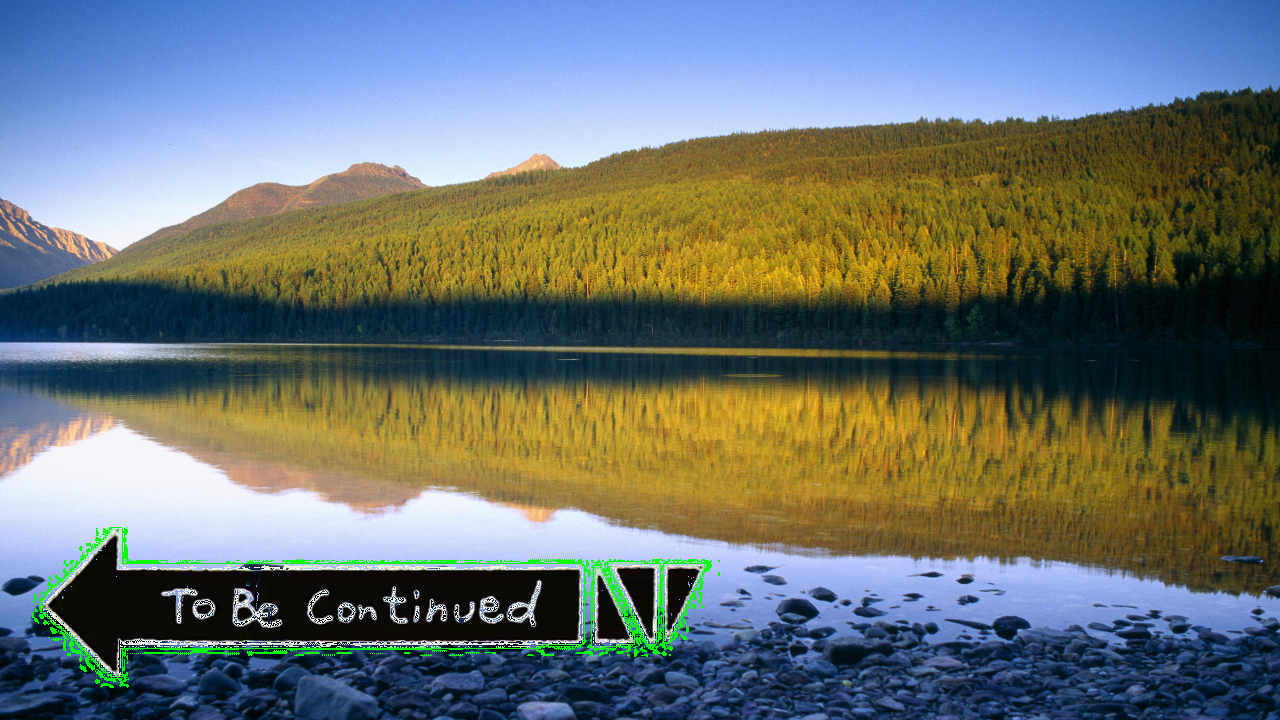

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def chroma_keying(photo_path, background_path, key_color=(0, 255, 0), threshold=254):
    # Load the images
    photo = cv2.imread(photo_path)
    background = cv2.imread(background_path)

    # Resize the background image to match the photo size
    background = cv2.resize(background, (photo.shape[1], photo.shape[0]))

    # Convert the photo to HSV color space
    hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)

    # Define the range of colors to be replaced (green screen color)
    lower_range = np.array([key_color[0] - threshold, key_color[1] - threshold, key_color[2] - threshold])
    upper_range = np.array([key_color[0] + threshold, key_color[1] + threshold, key_color[2] + threshold])

    # Create a binary mask for the chroma key color
    mask = cv2.inRange(hsv, lower_range, upper_range)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Extract the region of interest from the photo
    photo_fg = cv2.bitwise_and(photo, photo, mask=mask)

    # Extract the region of interest from the background
    background_bg = cv2.bitwise_and(background, background, mask=mask_inv)

    # Combine the foreground and background
    result = cv2.add(photo_fg, background_bg)

    # Display the result
    cv2_imshow(result)

# Paths to input images
chroma_keying("wati.jpg", "wow.jpg")
